## Breast Cancer Dataset

#### Here we're interested in predicting whether a cell is cancerous or not. We're using the Breast Cancer dataset in which each cell is represented by a feature vector of its characteristics such as its size, etc., and is classiffied as being benign, or malignant. 

Exploring the number of data points in the dataset as well as the number of features of each data point 

In [30]:
from sklearn import datasets

cancer=datasets.load_breast_cancer()
print('number of data points: ', cancer.data.shape[0], 'and number of features: ', cancer.data.shape[1])


number of data points:  569 and number of features:  30


Here we're randomly split the data into train and test with the ratio 80/20, that is, use 80% of the data to fit the line, and the remaining 20% for testing, with the pre-specified random seed. We train a 5 nearest neighbor classifier on the training data. Then, we use the trained model on the test data and report the area under the ROC curve (AUC).


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#independent variable
X = cancer.data
#dependent varibale
Y = cancer.target
# training and testing dependent and independent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1234)
#KNN object
my_knn = KNeighborsClassifier(n_neighbors=5) 
#fitting KNN on training set
my_knn.fit(X_train, Y_train)
#predicting based on the learnt model
Y_pred = my_knn.predict(X_test)

#checkinh the roc under the curve
from sklearn.metrics import roc_auc_score
print('the area under the ROC curve is: ', roc_auc_score(Y_test, Y_pred))

the area under the ROC curve is:  0.926570048309


Now let's perform 5-fold cross validation. We plot the ROC curve of each fold and compute the AUC of each fold. Then, report the average AUC of all 5 folds. By comparing the obtained AUCs we realize that it is more meaningful to perform cross validation.

Round  1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113]
my thresholds: [2 1 0]


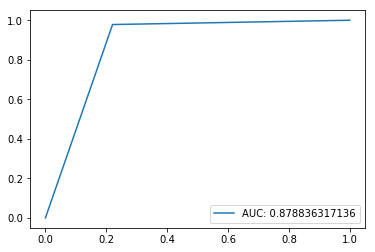

Round  2
[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227]
my thresholds: [2 1 0]


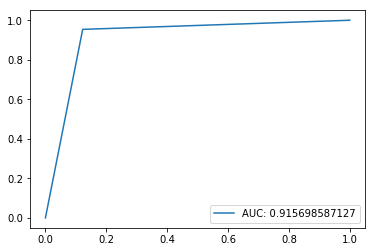

Round  3
[228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341]
my thresholds: [2 1 0]


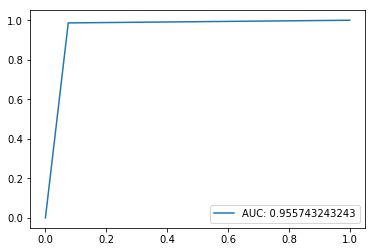

Round  4
[342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455]
my thresholds: [2 1 0]


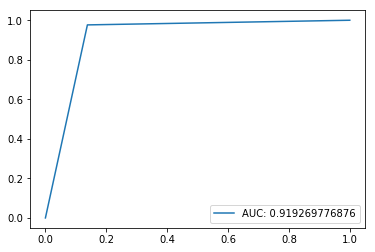

Round  5
[456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473
 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491
 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509
 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527
 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563
 564 565 566 567 568]
my thresholds: [2 1 0]


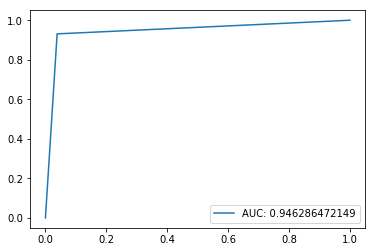

The average AUC is:  0.923166879306


In [43]:
from sklearn import metrics 
from sklearn.metrics import auc 
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=5, random_state=1234)

aucs = []
j =1
for i, (train_index, test_index) in enumerate(kf.split(X, Y)):
    print ('Round ', j)
    #fitting the KNN for each class
    print(test_index)
    my_knn.fit(X[train_index], Y[train_index])
    y_pred = my_knn.predict(X[test_index])
    fpr, tpr, thresholds = metrics.roc_curve(Y[test_index], y_pred)
    #for each calculate the ROC curve and area under the curve
    #auc = metrics.roc_curve(Y_train[test_index], y_pred)
    auc = roc_auc_score(Y[test_index], y_pred)
    #appendning all aucs to the list for taking average later
    aucs.append(auc)
    #operations for plotting
    plt.plot(fpr, tpr, label = "AUC: "+str(auc))
    plt.legend(loc=4)
    plt.show()
    j += 1

average = sum(aucs)/len(aucs)
print('The average AUC is: ', average)

it's more meaningful to get the average of AUCs